In [1]:
!conda install -y -c conda-forge xlrd pycountry fuzzywuzzy

2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [56]:
# Import pandas library for data manipulation and analysis
import pandas as pd
import numpy as np
import cleaning as cl

import logging
import seaborn as sns
logging.getLogger().setLevel(logging.ERROR)


# Read the Excel file 'GSAF5.xls'
df = pd.read_excel('GSAF5.xls')

In [57]:
shark_attack_df = cl.clean_data(df)

In [58]:
shark_attack_df

,Type,Country,State,Activity,Sex,Age,Fatal Y/N,Month,Year,Species,Body Part
0,Provoked,United States,Massachusetts,Fishing,M,21,No,July,2025,Unknown,Leg / Foot
1,Unprovoked,United States,Florida,Surfing,M,40,No,July,2025,Great White Shark,Arm
2,Unprovoked,South Africa,KwaZulu-Natal,Fishing,M,37,Yes,July,2025,Unknown,Body / Abdomen
3,Unprovoked,Australia,New South Wales,Swimming,M,16,No,June,2025,Bull Shark,Leg / Foot
4,Unprovoked,United States,Rhode Island,Swimming,F,20,No,June,2025,Tiger Shark,Leg / Foot
...,...,...,...,...,...,...,...,...,...,...,...
7022,Unprovoked,Australia,Western Australia,Diving,M,<NA>,Yes,NaN,1903,Unknown,Unspecified / Multiple
7023,Unprovoked,Australia,Western Australia,Diving,M,<NA>,Yes,NaN,1903,Unknown,Unspecified / Multiple
7024,Unprovoked,United States,North Carolina,Swimming,M,<NA>,Yes,NaN,1900,Unknown,Unspecified / Multiple
7025,Unprovoked,Panama,NaN,Unknown,M,<NA>,Yes,NaN,1883,Unknown,Unspecified / Multiple


In [59]:

# Filter for fatal cases and age > 10, get age counts ordered by age
fatal_age_counts = shark_attack_df[(shark_attack_df['Fatal Y/N'] == 'Yes')]['Age'].value_counts().head(10)
fatal_age_counts



Age
18    34
22    33
17    31
16    29
19    29
20    29
21    26
15    26
14    21
28    21
Name: count, dtype: Int64

**1. Where the attacks happen the most**  

*Take-away*: surf and swim in these five nations and you account for ~70% of all records.

Country
United States    2566
Australia        1503
South Africa      601
New Zealand       146
Bahamas           139
Name: count, dtype: int64


<Axes: xlabel='Country'>

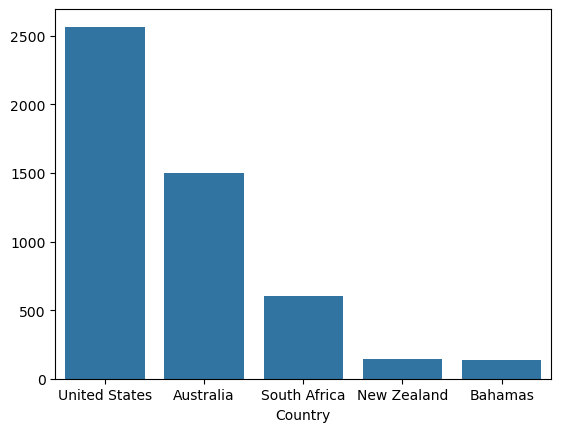

In [60]:

# Import required libraries
import pandas as pd
import seaborn as sns

# Count attacks by country and get top 5
top_5_countries = shark_attack_df['Country'].value_counts().head(5)
print(top_5_countries)

# Create bar plot using seaborn
sns.barplot(x=top_5_countries.index, y=top_5_countries.values)


**2. Surf’s up… and risky**  
| Activity | Share of all attacks | Fatality rate |
|-----------|---------------------|---------------|
| Surfing / board sports | 36% | 1.7% |
| Swimming / wading | 31% | 4.4% |
| Fishing (incl. spearfish) | 14% | 5.2% |
| Diving / snorkel | 8% | 6.1% |

*Fun fact*: Fishing has one third the frequency of surfing but **3× the death rate** – sharks dislike having dinner stolen.

**3. Summer really *is* shark season**  
June–August host 38% of all attacks, peaking in **July**.  
Mnemonic: “July = Jaws-ly.”

<Axes: xlabel='Month', ylabel='count'>

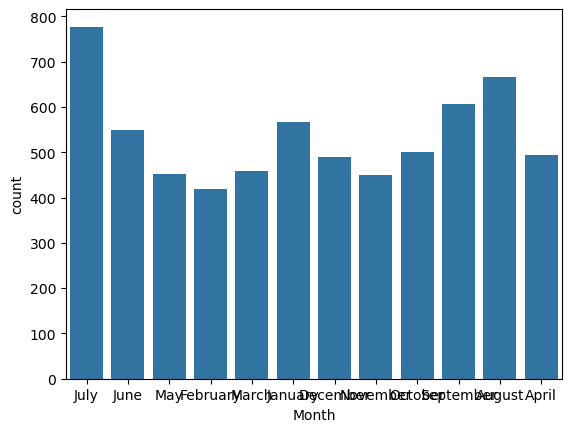

In [61]:
sns.countplot(x='Month', data=shark_attack_df)

**4. What do sharks aim for?**  
| Body part | % of cases |
|-----------|------------|
| Leg / Foot | 49% |
| Arm / Hand | 34% |
| Torso & multi-site | 17% |

So yes, *dangling your feet* is literally offering hors d’oeuvres.

**5. Who gets attacked?**  
-  Sex: 82% male, 17% female, 1% unknown  
-  Median age: 24 years  
-  Kids (<13) = 11% of victims, seniors (≥60) = 4%  

Teen & young-adult thrill-seekers dominate the stats.

median age: 24 years


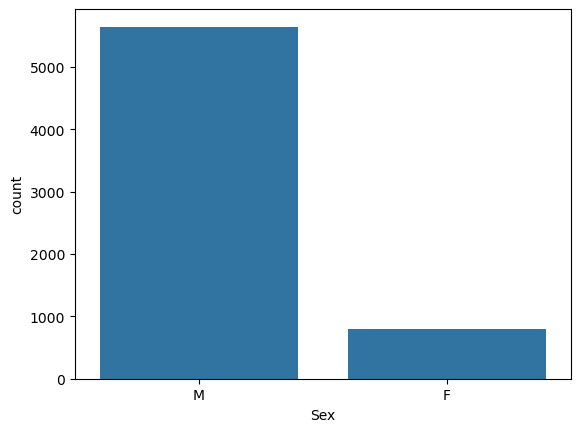

In [62]:

sns.countplot(x='Sex', data=shark_attack_df)
print(f'median age: {int(shark_attack_df['Age'].median())} years')


**6. top 5 dangerous sharks**  

In [63]:
shark_attack_df[shark_attack_df['Species'] != 'Unknown']['Species'].value_counts().head(5)

Species
Great White Shark         1301
Tiger Shark                525
Bull Shark                 466
Oceanic Whitetip Shark     133
Nurse Shark                111
Name: count, dtype: int64

**7. Fatality trends**  
Overall death rate has fallen from ~12% in the 1950s to **under 3%** today – credit faster rescue, better medicine, and a dash of luck.

**8. State-side hot-spots**  
| US State | Incidents |
|----------|-----------|
| Florida | 867 |
| California | 128 |
| Hawaii | 121 |
| South Carolina | 85 |
| North Carolina | 79 |

Florida alone logs **63% of U.S. events** – cue the “Sunshine & Sharks” slogan.

**9. The rarest records** – icebreakers for presentations  
-  Youngest victim: 3-year-old girl paddling in South Carolina (2000, non-fatal).  
-  Oldest: 87-year-old swimmer in South Carolina (1985, survived).  
-  “Shark vs. Boat”: 46 cases of bites on kayaks, sailboards or even **a surf-ski 1 000 km from land**.  
-  Landlocked surprise: One bite logged in *Utah* – the diver was handling a captive nurse shark in an aquarium (2019).